# MNIST
### . MNIST는 데이터 분석 입문용 데이터로 0~9에 해당하는 숫자를 분류해보는 분석 데이터이다.
### . 딥러닝에 입문하면서 MNIST를 이용한 딥러닝 분석을 진행해보았다.

In [52]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
import pandas as pd
import sys

In [3]:
# seed 값을 설정한다.
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [48]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [49]:
print("Train set : %d count" % (X_train.shape[0]))
print("Test set : %d count" % (X_test.shape[0]))

Train set : 60000 count
Test set : 10000 count


#### . 그래프로 확인해보자.

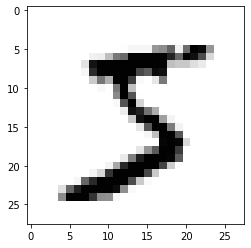

In [50]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

#### . 코드로 확인해보자.

In [53]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


#### . 그래프를 표현하면 5를 이루는 것을 확인할 수 있고 숫자로 표현된 그래프를 확인하면 5를 표현하는 픽셀의 숫자가 높은 것을 화인할 수 있다.

#### . 한 개의 이미지는 28x28(=784)픽셀로 이루어져 있기 때문에 이는 784차원의 벡터로 저장되어 있고 784차원에는 진하기의 정도에 따라 0~255 사이의 값이 들어있다.
#### . 차원의 값을 0~1의 값으로 만들어주기 위해 데이터를 로딩 후 변환을 실행하였다.

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [5]:
# 모델이 인식할 수 있도록 변환
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

### . CNN을 이용한 모델 학습 진행
#### . 컨볼루션과 맥스풀링, 드랍아웃기법을 활용한 CNN 진행

In [33]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=1, callbacks=[early_stopping_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 116s 2ms/step - loss: 0.2512 - accuracy: 0.9226 - val_loss: 0.0507 - val_accuracy: 0.9831
Epoch 2/30
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0846 - accuracy: 0.9754 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 3/30
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.0272 - val_accuracy: 0.9908
Epoch 4/30
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 5/30
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0272 - val_accuracy: 0.9921
Epoch 6/30
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0253 - val_accuracy: 0.9921
Epoch 7/30
60000/60000 [==============================] - 118s

#### . Early Stopping으로 인해 19번의 시도를 끝으로 모델 학습 종료

In [35]:
# 정확도 확인
print("Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 5s 499us/step
Test Accuracy: 0.9940


#### . Accuracy : 99.4

#### . train과 test의 loss 그래프 비교

In [38]:
# Train의 오차
y_vloss = history.history['val_loss']
# Test의 오차
y_loss = history.history['loss']

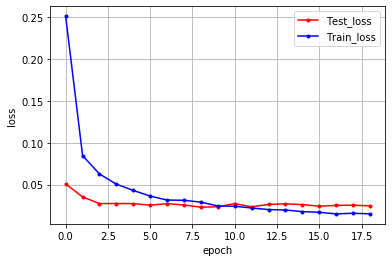

In [39]:
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Test_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### . 최적의 loss값을 향해 가는 것을 그래프로 확인 가능

#### . kaggle에 제출하여 성능확인을 위한 test셋을 불러와 예측 실행

In [40]:
test = pd.read_csv('./dataset/test.csv')
test = test.values

In [41]:
test = test.reshape(test.shape[0], 28, 28, 1).astype('float32') / 255

In [42]:
predict = model.predict(test)
predict

array([[2.40905062e-18, 9.71578740e-19, 1.00000000e+00, ...,
        6.65658113e-17, 9.93453095e-15, 4.51873284e-16],
       [9.99999523e-01, 2.57099671e-11, 1.87959017e-07, ...,
        1.30545947e-08, 1.25222133e-09, 2.08416665e-07],
       [3.28059196e-16, 4.12178364e-12, 6.70576442e-11, ...,
        1.78686883e-12, 1.24065407e-08, 9.99990344e-01],
       ...,
       [4.84139961e-26, 2.39208584e-15, 1.34138607e-18, ...,
        1.43728812e-16, 2.17727013e-16, 1.34924963e-16],
       [4.15372963e-14, 1.38204032e-12, 2.07217378e-15, ...,
        8.31375246e-11, 1.40715939e-10, 9.99998689e-01],
       [1.57742412e-19, 1.42626567e-17, 1.00000000e+00, ...,
        1.28318676e-17, 6.43348612e-12, 5.52802839e-15]], dtype=float32)

#### . 모델의 예측결과가 각 label에 속할 확률로 반환되기 때문에 np.argmax와 for문을 이용해 제일 높은 값을 predict_label로 저장한다.

In [43]:
predict_label=[]
for i in range(len(predict)):
    predict_label.append(np.argmax(predict[i]))
    print(np.argmax(predict[i]))

2
0
9
0
3
7
0
3
0
3
5
7
4
0
4
3
3
1
9
0
9
1
1
5
7
4
2
7
4
7
7
5
4
2
6
2
5
5
1
6
7
7
4
9
8
7
8
2
6
7
6
8
8
3
8
2
1
2
2
0
4
1
7
0
0
0
1
9
0
1
6
5
8
8
2
8
9
9
2
3
5
4
1
0
9
2
4
3
6
7
2
0
6
6
1
4
3
9
7
4
0
9
2
0
7
3
0
5
0
8
0
0
4
7
1
7
1
1
3
3
3
7
2
8
6
3
8
7
7
4
3
5
6
0
0
0
3
1
3
6
4
3
4
5
5
8
7
7
2
8
4
3
5
6
5
3
7
5
7
8
3
0
4
5
1
3
7
6
3
0
2
7
8
6
1
3
7
4
1
2
4
8
5
2
4
9
2
1
6
0
6
1
4
9
6
0
9
7
6
9
1
9
0
9
9
0
8
4
6
2
0
9
3
6
3
2
1
6
3
4
2
3
1
2
2
0
4
6
1
0
0
4
9
1
7
3
2
3
8
6
8
6
2
8
5
5
4
8
3
5
9
7
1
3
8
4
5
1
4
5
6
3
3
5
7
0
6
8
3
1
6
0
6
3
9
5
1
5
8
4
0
9
2
0
5
3
7
1
9
9
5
7
7
9
9
6
3
0
3
3
6
9
8
2
6
3
7
1
4
5
8
5
9
0
0
3
8
4
1
8
4
1
1
9
8
4
5
1
5
3
6
3
1
3
0
9
0
0
6
0
6
3
1
8
6
0
6
5
2
2
6
7
7
2
5
8
3
9
2
7
8
6
3
8
4
2
3
8
1
6
4
8
7
9
7
6
9
5
3
7
6
5
5
4
2
6
2
1
3
7
1
7
9
9
6
1
1
1
7
3
9
7
6
1
1
1
9
3
8
5
5
0
4
1
2
3
1
1
3
5
9
6
6
5
3
1
4
7
4
7
4
8
5
2
6
1
3
9
5
0
8
4
7
4
4
4
1
5
3
9
9
7
6
9
5
9
2
3
5
6
6
7
5
0
5
1
7
4
4
1
1
4
9
5
6
0
1
3
1
0
4
8
1
2
7
9
4
8
3
7
7
4
2
4
6
7
6
3
2
0


6
6
3
2
6
7
0
6
0
2
2
3
0
0
3
3
4
1
1
4
3
3
0
0
3
2
4
1
5
9
2
4
9
5
8
9
9
9
1
8
0
0
9
0
8
2
0
9
8
6
2
3
2
0
6
3
8
1
9
2
0
4
2
8
9
4
3
6
0
2
0
4
5
3
4
1
2
2
4
9
4
3
2
1
9
1
6
1
0
3
4
0
1
9
4
0
0
4
8
1
9
2
3
3
4
3
7
0
7
9
7
4
5
9
7
7
0
4
2
2
7
8
5
0
4
9
8
8
2
4
1
4
1
4
1
0
9
9
5
6
4
9
1
2
6
0
3
0
2
3
0
4
0
1
0
8
4
9
3
7
1
4
1
7
6
0
7
7
1
5
0
3
6
0
2
8
8
8
5
7
7
2
9
6
7
8
8
6
7
3
1
7
3
1
8
0
1
0
4
3
7
2
9
7
9
3
6
2
3
4
1
3
0
9
9
2
6
4
0
0
7
5
1
8
3
8
1
6
5
8
9
3
2
0
7
1
6
7
1
6
8
4
3
5
9
1
3
5
3
1
9
2
5
8
6
3
6
0
9
2
5
1
3
7
4
4
4
2
0
6
3
1
0
4
3
6
1
7
6
2
7
1
7
0
6
9
6
5
1
3
6
8
1
9
8
6
6
9
3
6
8
2
4
0
6
1
8
5
1
4
0
9
9
9
4
8
4
1
6
4
9
1
8
9
2
3
4
6
1
0
1
6
7
9
0
0
8
1
4
2
5
2
8
4
6
9
7
1
8
3
5
4
9
3
3
5
3
0
0
5
9
2
5
3
7
6
5
9
6
5
0
2
1
3
8
5
7
7
0
7
7
1
5
6
7
0
4
3
0
0
0
0
7
6
8
8
6
7
1
3
1
0
2
3
5
1
8
6
1
7
6
3
6
6
8
3
8
5
1
5
2
6
5
1
5
8
3
5
5
3
1
3
8
5
8
6
7
0
3
8
8
4
2
6
4
5
8
3
0
5
1
1
3
0
9
6
7
8
2
5
3
6
2
0
6
5
1
2
9
1
0
2
5
5
6
1
4
1
3
1
5
5
0
1
9
3
9
5
0
7
9
8
3
0
1
3
5
8
1
8


1
7
4
6
4
5
8
7
1
4
7
9
7
8
0
8
6
9
8
3
1
2
8
1
1
9
5
8
8
6
0
7
6
4
6
3
2
6
0
9
1
6
5
2
7
3
4
3
1
0
6
8
7
6
4
0
5
0
9
7
5
3
6
4
4
9
7
7
4
2
2
1
1
5
3
5
4
7
1
3
4
8
7
7
1
1
9
4
4
4
3
0
3
7
8
1
6
4
0
6
2
9
0
6
3
6
6
6
5
1
9
9
3
6
3
2
0
7
2
0
3
2
5
7
9
6
4
8
4
4
1
9
8
8
9
1
5
7
1
6
7
0
2
8
2
4
5
5
2
6
1
1
4
0
9
4
3
7
9
3
0
2
9
6
3
3
3
2
3
4
6
7
9
3
6
7
8
3
9
1
2
4
5
9
9
4
1
4
7
6
8
2
8
0
6
2
9
6
7
1
2
7
8
6
0
8
8
1
7
7
3
5
3
7
4
7
0
4
1
9
1
5
2
1
6
6
0
9
6
6
0
2
1
7
9
5
8
2
7
2
3
0
2
1
9
9
9
1
3
3
6
9
3
3
7
4
1
8
1
7
5
4
2
8
0
6
4
6
4
7
4
6
7
8
0
2
3
3
8
7
2
3
4
4
9
6
8
6
6
1
2
8
1
7
6
7
1
8
7
6
2
9
7
5
8
4
6
8
0
1
7
3
2
0
8
8
3
5
4
1
8
6
4
1
0
1
1
0
2
4
5
6
4
3
8
6
2
6
9
8
4
6
5
6
2
5
7
4
9
1
3
8
2
8
4
9
5
8
8
4
2
6
1
5
5
3
6
7
0
3
4
6
6
5
6
1
3
7
7
2
7
3
3
3
9
1
2
1
5
1
1
6
0
2
9
6
9
6
6
5
1
0
0
7
6
9
5
1
7
6
9
7
4
8
2
3
6
8
6
3
2
1
0
8
9
2
4
4
0
0
9
6
8
8
3
9
3
9
7
9
7
3
7
8
8
2
3
8
4
1
2
7
2
1
2
7
1
2
0
5
3
5
5
3
3
8
6
9
9
0
2
5
7
4
6
8
6
2
3
3
7
8
8
4
9
7
0
3
8
7
4
8
2
8
7
7
5
7
8
0


7
5
4
1
6
0
3
8
9
9
7
8
2
5
8
5
5
2
1
8
4
1
6
9
3
9
9
1
8
7
4
1
2
2
5
6
5
8
7
3
6
1
2
6
8
1
8
6
7
4
1
9
3
4
0
9
1
1
0
1
8
1
3
9
0
2
8
5
5
0
8
8
7
7
1
9
9
0
3
4
4
6
3
0
2
4
4
7
1
4
1
9
3
8
2
0
4
7
3
2
6
7
1
5
1
1
2
4
0
0
4
8
8
5
2
5
8
5
9
0
3
2
4
8
2
0
2
4
5
1
6
8
9
1
0
3
2
6
1
1
6
8
2
9
0
0
0
8
2
4
3
2
8
2
6
7
4
6
4
3
2
0
9
8
6
4
3
0
3
0
3
0
2
9
2
1
8
4
7
7
2
7
3
1
3
7
0
3
7
2
0
2
0
7
9
1
2
0
5
6
2
3
6
2
4
9
4
5
8
9
3
7
4
2
9
4
8
6
7
0
3
8
7
1
3
1
6
5
0
6
0
1
9
6
4
0
8
8
7
4
0
9
9
6
8
0
2
4
8
4
4
1
7
1
1
9
2
2
7
6
8
0
2
9
6
0
6
9
0
3
7
7
7
9
5
0
3
8
9
8
0
1
4
6
7
9
7
7
9
7
6
2
8
2
1
4
9
7
5
8
1
2
1
1
7
1
9
3
0
1
9
9
6
0
1
8
5
0
7
4
6
6
2
9
2
1
3
5
1
9
3
8
9
3
4
1
1
8
9
9
7
5
4
1
6
0
8
2
6
0
9
0
6
8
7
2
0
3
4
7
8
4
6
0
0
5
8
2
3
3
5
1
2
1
3
8
7
2
8
2
1
0
4
4
4
2
3
6
1
4
4
1
1
6
5
7
1
5
4
1
5
9
4
3
3
3
4
0
7
4
1
3
8
1
1
6
5
7
3
9
5
4
5
6
4
3
5
7
5
9
3
8
0
8
9
6
8
5
7
9
0
9
7
2
9
1
3
8
1
4
7
3
8
1
5
7
5
0
2
7
3
1
0
1
3
2
2
2
4
0
0
4
9
5
9
1
7
0
1
4
5
8
3
0
4
0
9
6
9
0
2
0
7
3
5
6
8
2
9
1


0
7
6
4
3
2
3
1
7
6
7
6
8
9
0
7
3
6
9
6
9
4
6
9
5
9
7
1
5
9
3
2
7
6
7
8
1
6
1
8
9
7
7
1
6
0
5
8
5
7
1
4
7
2
1
7
6
6
2
4
2
3
5
5
2
9
0
2
8
3
7
8
2
0
7
2
7
2
9
1
2
0
2
9
3
0
6
2
8
0
3
7
4
1
4
0
3
1
4
5
7
9
3
1
9
5
0
4
7
2
2
1
9
5
7
2
6
2
6
7
7
8
0
5
2
7
0
2
0
2
0
2
4
2
5
9
2
3
2
7
5
1
4
2
5
6
1
9
8
8
9
4
5
5
8
8
6
8
6
5
0
0
6
9
5
4
4
4
2
2
2
1
7
7
8
0
0
1
6
5
4
2
0
2
5
7
8
5
2
4
4
9
4
4
6
6
4
0
3
9
1
3
2
4
0
0
1
1
7
6
2
5
1
2
7
5
1
8
0
1
5
7
8
5
9
1
2
7
7
0
0
1
7
3
0
3
1
4
1
3
8
3
7
3
9
1
7
7
1
2
6
5
8
0
3
2
0
6
5
4
6
7
0
3
4
6
3
5
2
7
7
5
5
4
9
0
3
1
5
3
1
2
0
2
4
8
9
4
2
9
2
5
9
5
3
4
2
6
6
5
2
9
9
7
7
7
7
4
4
8
8
7
6
9
4
4
9
0
9
6
7
2
9
4
1
9
6
7
5
7
6
0
6
9
9
9
4
2
5
5
3
0
3
6
1
8
4
6
2
7
2
7
9
9
3
4
7
1
7
6
6
1
5
0
1
3
0
1
3
2
6
5
3
4
3
9
9
3
3
0
7
5
9
6
6
4
6
9
7
3
6
1
6
8
6
7
7
1
6
0
4
2
2
5
8
9
1
9
2
3
3
7
9
1
9
7
1
8
8
5
6
7
6
0
7
6
3
1
0
7
9
5
7
8
1
0
9
9
4
0
0
7
7
4
4
7
1
5
7
1
3
3
0
0
9
1
7
0
2
0
1
5
0
3
7
9
2
4
4
9
8
2
0
4
3
6
1
9
4
8
9
6
8
9
4
9
8
5
9
2
3
8
6
5
4
5
0
1
9
0


2
7
9
5
3
1
9
0
2
9
9
7
6
7
3
7
1
4
7
7
6
1
0
5
0
7
5
4
0
8
9
2
0
0
9
0
8
2
6
2
4
7
5
3
8
0
1
4
7
4
4
5
5
9
4
9
6
3
4
9
1
1
9
1
5
4
1
8
5
2
6
3
4
6
0
6
4
4
3
3
4
4
2
8
4
0
6
1
2
7
9
6
5
4
9
3
2
5
1
3
0
9
3
0
6
2
1
6
6
2
6
5
8
7
2
4
1
9
9
7
0
6
8
3
9
0
4
4
3
8
0
0
6
7
1
1
4
9
9
8
4
8
1
0
2
5
7
4
7
6
3
7
8
2
1
3
6
8
9
6
4
5
1
2
3
1
7
6
7
9
5
3
2
4
4
3
2
8
8
0
2
7
4
6
3
3
2
3
3
0
9
4
8
5
6
6
3
8
7
1
4
0
8
5
1
0
7
1
4
2
5
4
3
6
2
3
6
5
3
2
1
3
1
9
9
4
6
9
8
0
9
2
0
3
5
9
5
9
0
2
9
4
9
3
4
8
9
3
6
0
5
1
9
1
5
2
1
2
3
9
6
2
4
6
6
0
9
1
3
7
7
4
6
8
2
1
8
3
1
2
6
2
1
0
0
6
2
5
4
6
2
8
9
8
8
7
0
5
2
9
1
1
1
6
7
2
7
8
0
5
2
0
6
2
3
8
4
0
7
1
9
6
4
0
2
3
8
7
8
6
7
1
0
3
0
9
2
2
2
8
0
5
0
3
6
1
4
9
1
5
2
3
0
7
2
9
2
6
7
9
4
3
7
3
0
4
9
6
9
9
4
5
3
3
4
1
8
8
1
4
8
7
4
3
8
4
8
6
4
3
4
8
5
6
8
7
5
3
8
7
9
3
0
0
5
3
9
8
4
3
2
7
1
0
7
1
1
7
7
0
0
5
1
8
7
7
4
2
4
7
5
0
8
9
7
9
5
0
7
0
7
7
8
3
3
4
5
1
6
9
7
1
2
2
9
6
6
1
4
2
0
5
8
1
6
5
6
3
7
7
2
7
6
9
5
3
1
1
6
4
3
6
1
4
8
4
1
6
1
9
7
7
7
1
7
9
3
7
4
6


#### . 제출용 파일을 불러와서 제출 실행

In [44]:
sample_submission = pd.read_csv('./dataset/sample_submission.csv')

In [45]:
sample_submission['Label'] = predict_label

In [46]:
sample_submission.to_csv('submissin.csv',index = False)

### . Kaggle`s score : 99.871